# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [180]:
! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-01-11 10:59:54--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.3’

car_data.csv.3      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2023-01-11 10:59:54 (4.83 MB/s) - ‘car_data.csv.3’ saved [58374/58374]



In [181]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [182]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,88,91,42,84,209,75,6,171,38,20,138,189,446,161,69,3,12,196,201
1,540,92,45,74,187,74,7,157,41,19,143,179,375,183,70,8,6,195,201
2,603,90,36,85,184,64,6,160,41,20,125,187,385,139,66,9,31,195,203
3,17,99,41,77,197,69,6,177,36,21,139,202,485,151,72,4,10,198,199
4,786,107,55,103,213,68,11,219,30,25,172,221,709,216,70,10,7,187,197
5,735,86,37,77,144,54,7,154,43,19,127,179,352,145,71,14,13,186,191
6,532,104,49,105,209,61,11,207,32,24,157,217,637,168,64,0,19,193,207
7,435,85,37,68,145,60,6,130,51,18,130,150,253,121,65,3,14,195,203
8,403,96,39,77,160,62,8,140,47,18,150,161,294,124,62,15,3,201,208
9,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207


Methods `describe` and `info` deliver some useful information.

In [183]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.428051,93.876138,44.923497,82.415301,170.256831,61.892532,8.577413,169.488160,40.770492,20.622951,148.060109,189.426230,443.948998,175.136612,72.273224,6.435337,12.595628,189.185792,195.859745
std,244.351885,7.960621,6.200540,15.719096,33.485065,8.042617,4.615501,33.748403,7.818316,2.641938,14.484009,32.009586,180.127067,32.936367,7.532293,4.800577,8.817930,6.031403,7.365856
min,0.000000,77.000000,33.000000,40.000000,109.000000,47.000000,3.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,207.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,150.000000,67.000000,3.000000,5.000000,185.000000,191.000000
50%,422.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,630.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,218.000000,600.000000,200.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,182.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [184]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

**Посмотрим на значения лейблов**

In [185]:
pd.unique(y_train)

array(['bus', 'saab', 'opel', 'van'], dtype=object)

**Лейблы являются текстом, поэтому их необходимо преобразовать в числовой формат**

In [186]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_train_l = labelencoder.fit_transform(y_train)
y_test_l = labelencoder.fit_transform(y_test)

**Теперь проведем процедуру стандартизации набора данных с помощью StandardScaler. Для нормирования из данных вычтем среднее и поделим на дисперсию.**

In [187]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

**Осуществим поиск оптимальных параметров модели с помощью GredSearchCV**

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(0.1, 1, 10),
}

logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
clf = GridSearchCV(logreg, 
                   param_grid = parameters,
                   scoring = 'accuracy',
                   cv = 10)

In [189]:
clf.fit(X_train_s, y_train_l)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [190]:
print("Tuned hyperparameters:", clf.best_params_)
print("Accuracy:", clf.best_score_)

Tuned hyperparameters: {'C': 1.2589254117941673, 'penalty': 'l1'}
Accuracy: 0.8049494949494947


In [194]:
logmodel_b = LogisticRegression(**clf.best_params_, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logmodel_b.fit(X_train_s, y_train_l)

LogisticRegression(C=1.2589254117941673, max_iter=500,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)

**Итак, модель дает наилучший результат - точность около 81% - при использовании lasso-регуляризации и значении С=1,26.**

In [195]:
predicted_labels = logmodel_b.predict(X_test_s)

In [196]:
from sklearn.metrics import accuracy_score, f1_score

In [197]:
accuracy_score(y_test_l, predicted_labels)

0.7744107744107744

In [198]:
f1_score(y_test_l, predicted_labels, average='weighted')

0.7698044098990685

**Точность модели на тестовой выборке составляет около 77%.**

In [199]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Для лучшей наглядности построим график**

In [200]:
import scikitplot

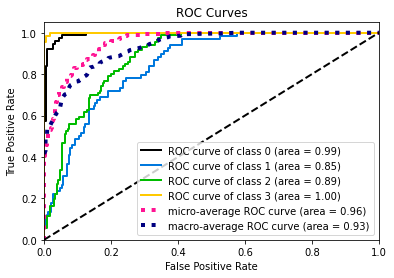

In [201]:
predicted_proba = logmodel.predict_proba(X_test_s)
scikitplot.metrics.plot_roc(y_test_l, predicted_proba)

**Наилучший результат логистичексая регрессия показывает для наблюдений 0 и 3 классов - 0,99 и 1,00 соответственно. Намного хуже результаты для наблюдений 1 и 2 классов.**

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [202]:
from sklearn.decomposition import PCA

pca = PCA()
num_features = X_train.shape[1]
pca.fit(X_train_s)                          

PCA()

In [203]:
explained_var = pca.explained_variance_ratio_
explained_var_cumsum = np.cumsum(explained_var)

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline

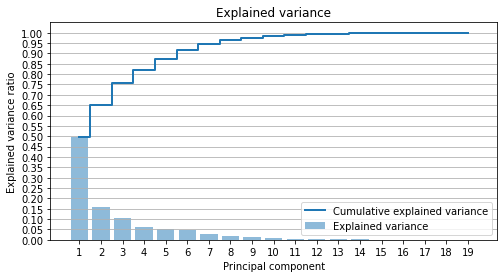

In [205]:
plt.figure(figsize=(8, 4))
plt.title("Explained variance")
plt.bar(range(1, num_features +1), pca.explained_variance_ratio_, alpha=0.5, align="center", label="Explained variance")
plt.step(range(1, num_features +1), explained_var_cumsum, label="Cumulative explained variance", linewidth=2, where="mid")
plt.xticks(range(1, num_features +1 ))
plt.yticks(np.arange(0, 1.01, 0.05))
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.grid(axis="y")
plt.legend()
plt.show()

In [206]:
explained_var_cumsum

array([0.4945362 , 0.6531847 , 0.75660611, 0.81954289, 0.87186131,
       0.91863911, 0.94663807, 0.96501604, 0.97630691, 0.98463633,
       0.98956638, 0.99296536, 0.99522307, 0.99703784, 0.99819585,
       0.99899275, 0.99965085, 0.99998225, 1.        ])

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Как видно из предыдущего графика, около 10 компонент объясняют 99% данных. Именно это количество компонент и будем использовать дальше.

In [207]:
n_pca = 10
pca = PCA(n_pca)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.fit_transform(X_test_s)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [209]:
parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(0.1, 1, 10),
    }

logreg_p = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
clf = GridSearchCV(logreg_p, parameters, cv=10)

In [210]:
clf.fit(X_train_pca, y_train_l)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ]),
                         'penalty': ['l1', 'l2']})

In [211]:
print("Tuned hyperparameters:", clf.best_params_)
print("Accuracy:", clf.best_score_)

Tuned hyperparameters: {'C': 1.9952623149688797, 'penalty': 'l2'}
Accuracy: 0.7102356902356902


In [212]:
logmodel_p = LogisticRegression(**clf.best_params_, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logmodel_p.fit(X_train_pca, y_train_l)

LogisticRegression(C=1.9952623149688797, max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001)

In [217]:
predicted_labels = logmodel_p.predict(X_test_pca)

In [219]:
accuracy_score(y_test_l, predicted_labels)

0.6363636363636364

In [221]:
f1_score(y_test_l, predicted_labels, average='weighted')

0.622971907150338

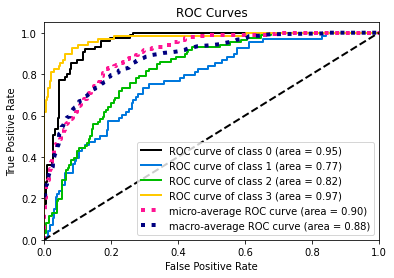

In [222]:
predicted_proba = logmodel_p.predict_proba(X_test_pca)
scikitplot.metrics.plot_roc(y_test_l, predicted_proba)

**Ввиду того, что размерность датасета уменьшилась, результаты логистической регрессии ухудшились. Точность снизилась до 71%. Наилучшие результаты также показывают наблюдения классов 0 и 3.**

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [223]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
parameters = {"max_depth": np.arange(3, 19)}
tree_g = GridSearchCV(tree, parameters)
tree_g.fit(X_train_pca, y_train_l)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 95.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnin

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])})

In [224]:
print("Tuned hyperparameters:",tree_g.best_params_)
print("Accuracy:",tree_g.best_score_)

Tuned hyperparameters: {'max_depth': 12}
Accuracy: 0.6447706422018348


In [225]:
tree_b = DecisionTreeClassifier(**tree_g.best_params_)
tree_b.fit(X_train_pca, y_train_l)

DecisionTreeClassifier(max_depth=12)

In [226]:
predicted_labels = tree_b.predict(X_test_pca)

In [227]:
accuracy_score(y_test_l, predicted_labels)

0.6195286195286195

In [228]:
f1_score(y_test_l, predicted_labels, average='weighted')

0.6206998246890844

In [229]:
predicted_proba = tree_b.predict_proba(X_test_pca)

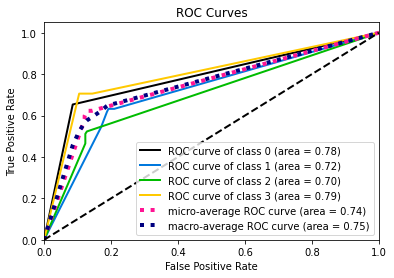

In [230]:
scikitplot.metrics.plot_roc(y_test_l, predicted_proba)

**Результаты решающего дерева оказались хуже результатов логистической регрессии. Точность снизилась до 0,64. **

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [242]:
from sklearn.ensemble import BaggingClassifier

n_estimates = np.arange(2, 100, 5)
accuracy_l = []
f1_scores_l = []

for n_estimators in n_estimates:
  clf = BaggingClassifier(base_estimator=logmodel_b, n_estimators=n_estimators, random_state=41).fit(X_train_pca, y_train_l)
  pred = clf.predict(X_test_pca)
  ac = accuracy_score(y_test_l, pred)
  f1 = f1_score(y_test_l, pred, average='weighted')
  f1_scores_l.append(f1)
  accuracy_l.append(ac)                    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

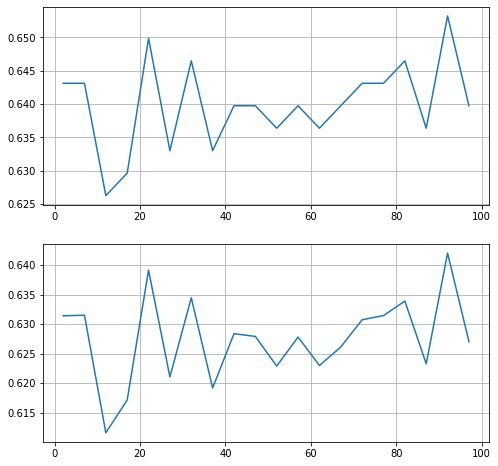

In [241]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax[0].plot(np.arange(2, 100, 5), accuracy_l)
ax[0].grid()
ax[1].plot(np.arange(2, 100, 5), f1_scores_l)
ax[1].grid()

**Наибольшая точность отмечается при применении Bagging с использование 90 регрессий**

In [245]:
n_estimates = np.arange(2, 100, 5)
accuracy_t = []
f1_scores_t = []

for n_estimators in n_estimates:
  clf = BaggingClassifier(base_estimator=tree_b, n_estimators=n_estimators, random_state=41).fit(X_train_pca, y_train_l)
  pred = clf.predict(X_test_pca)
  ac = accuracy_score(y_test_l, pred)
  f1 = f1_score(y_test_l, pred, average='weighted')
  f1_scores_t.append(f1)
  accuracy_t.append(ac)

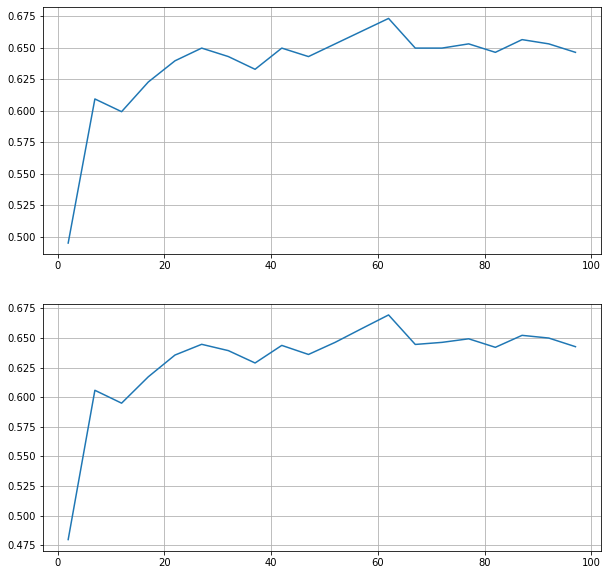

In [246]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(n_estimates, accuracy_t)
ax[0].grid()
ax[1].plot(n_estimates, f1_scores_t)
ax[1].grid()

**Оптимальное количество деревьев - 63, прибавление деревьев приводит к переобучению модели**

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [250]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.arange(2, 100, 5)
f1_scores = []
ac_scores = []

for n_estimators in n_estimates:
  clf = RandomForestClassifier(n_estimators=n_estimators, random_state=0, **tree_g.best_params_)
  clf.fit(X_train_pca, y_train_l)
  pred = clf.predict(X_test_pca)
  ac = accuracy_score(y_test_l, pred)
  f1 = f1_score(y_test_l, pred, average='weighted')
  ac_scores.append(ac)
  f1_scores.append(f1)

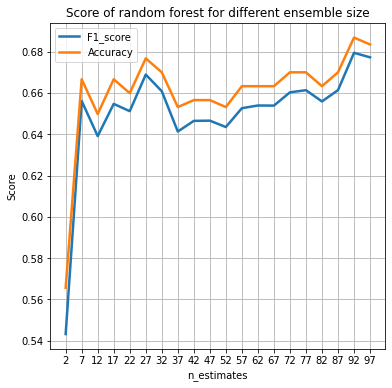

In [255]:
plt.figure(figsize=(6, 6))
plt.title("Score of random forest for different ensemble size")
plt.plot(n_estimates, f1_scores, label="F1_score", linewidth=2.5)
plt.plot(n_estimates, ac_scores, label="Accuracy", linewidth=2.5)
plt.xlabel("n_estimates")
plt.xticks(n_estimates)
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

**По сравнению с Baggins количество деревьев увеличилось. Наряду с этим увеличилось качество**

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [259]:
from sklearn.ensemble import RandomForestClassifier

def split_into_parts(size: int, n_parts: int):
  part_size = size // n_parts
  last_index = 0
  indeces = list(range(size))
  for i in range(n_parts):
      if (size - i * part_size) // (part_size + 1) == n_parts - i:
        part_size += 1
      last_index += part_size
      yield indeces[:last_index]

In [260]:
list(split_into_parts(10, 6))

[[0],
 [0, 1],
 [0, 1, 2, 3],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [265]:
from scikitplot.classifiers import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
train_data_sp = skf.split(X_train_pca, y_train_l)

**Для логистической регрессии**

In [266]:
split_indicies = [[]]*10
for i, (train_index, test_index) in enumerate(train_data_sp):
  split_indicies[i] = split_indicies[i-1] + list(train_index) + list(test_index)

In [267]:
ac_l_i = []
f1_l_i = []
for inds in split_indicies:
  clf = logmodel_b.fit(X_train_pca[inds], y_train_l[inds])
  preds = clf.predict(X_test_pca)
  ac_l_i.append(accuracy_score(y_test_l, preds))
  f1_l_i.append(f1_score(y_test_l, preds, average='weighted'))

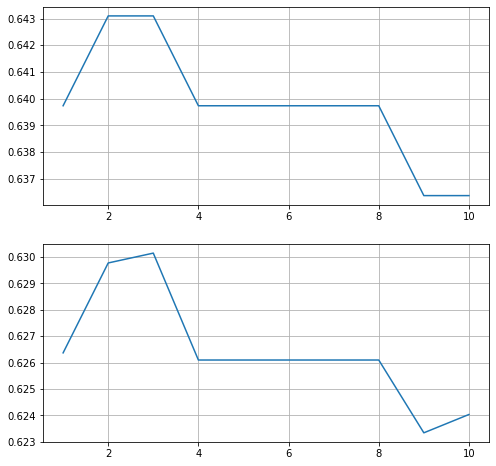

In [268]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

ax[0].plot(np.arange(1, len(split_indicies)+1, 1), ac_l_i)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_indicies)+1, 1), f1_l_i)
ax[1].grid()

**Логистичексая регрессия показывает хорошие результаты при 30% данных.**

**Для деревьев**

In [269]:
ac_t_i = []
f1_t_i = []
for inds in split_indicies:
  clf = tree_b.fit(X_train_pca[inds], y_train_l[inds])
  preds = clf.predict(X_test_pca)
  ac_t_i.append(accuracy_score(y_test_l, preds))
  f1_t_i.append(f1_score(y_test_l, preds, average='weighted'))

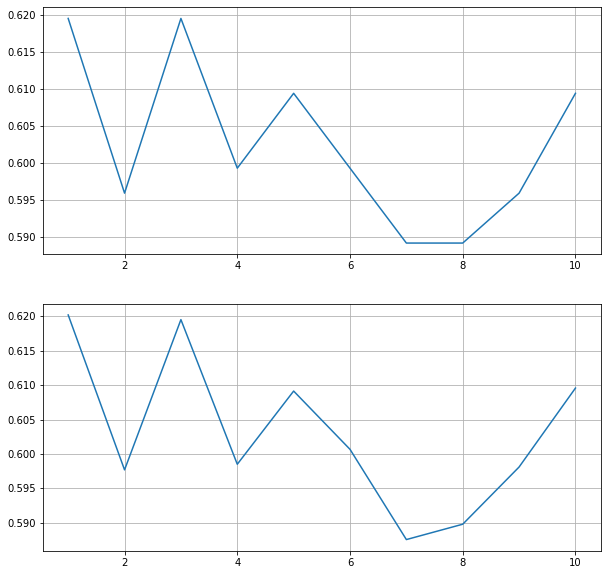

In [270]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(1, len(split_indicies)+1, 1), ac_t_i)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_indicies)+1, 1), f1_t_i)
ax[1].grid()

**Высокое качество наблюдается при 10% данных**

**Для леса**

In [273]:
ac_f_i = []
f1_f_i = []
for inds in split_indicies:
  clf = RandomForestClassifier(n_estimators=n_estimators, **tree_g.best_params_).fit(X_train_pca[inds], y_train_l[inds])
  preds = clf.predict(X_test_pca)
  ac_f_i.append(accuracy_score(y_test_l, preds))
  f1_f_i.append(f1_score(y_test_l, preds, average='weighted'))

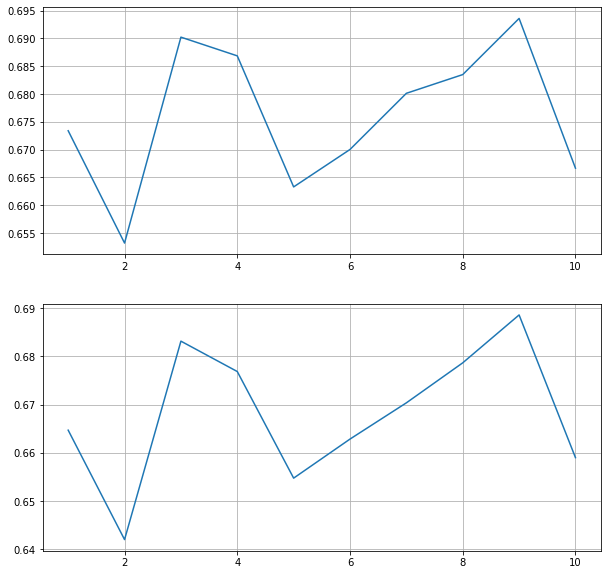

In [274]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(1, len(split_indicies)+1, 1), ac_f_i)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_indicies)+1, 1), f1_f_i)
ax[1].grid()

**Качество модели увеличивается при росте количества деревьев**